In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import shutil
import pywt

In [3]:
img = cv2.imread('./test_images/000010.jpg')
img.shape

(218, 178, 3)

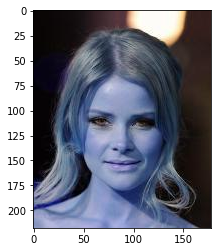

In [4]:
plt.imshow(img)

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(218, 178)

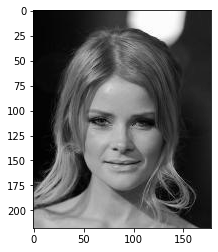

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.5, 5)
faces

array([[ 28,  64, 122, 122]], dtype=int32)

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(28, 64, 122, 122)

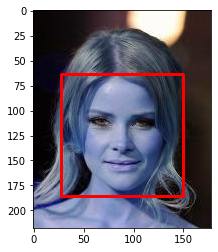

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

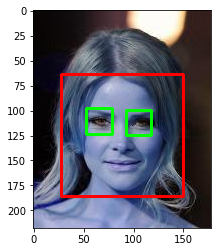

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

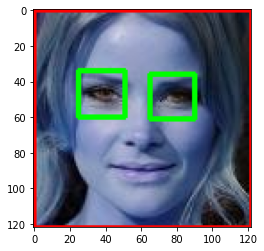

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.5, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

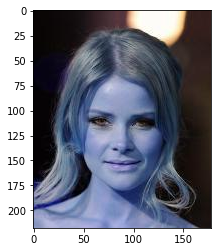

In [13]:
origional_image = cv2.imread('./test_images/000010.jpg')
plt.imshow(origional_image)

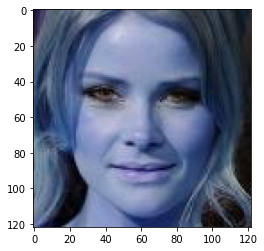

In [14]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/000010.jpg')
plt.imshow(cropped_image)

In [15]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [16]:
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [17]:
img_dirs.remove('./dataset/.ipynb_checkpoints')
img_dirs

['./dataset/cropped', './dataset/Female', './dataset/Male']

In [18]:
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [19]:
cropped_image_dirs = []
gender_file_names_dict = {}

for img_dir  in img_dirs:
    count = 1
    gender_name = img_dir.split('/')[-1]
    print(gender_name)
    
    gender_file_names_dict[gender_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + gender_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = gender_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color) 
            gender_file_names_dict[gender_name].append(cropped_file_path)
            count += 1
            

cropped
Female
Generating cropped images in folder:  ./dataset/cropped/Female
Male
Generating cropped images in folder:  ./dataset/cropped/Male


In [20]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

## Feature Engineering

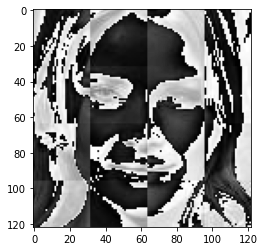

In [21]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [22]:
gender_file_names_dict = {}
for img_dir in cropped_image_dirs:
    gender_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    gender_file_names_dict[gender_name] = file_list
gender_file_names_dict

{'Female': ['./dataset/cropped/Female\\Female1.png',
  './dataset/cropped/Female\\Female10.png',
  './dataset/cropped/Female\\Female100.png',
  './dataset/cropped/Female\\Female1000.png',
  './dataset/cropped/Female\\Female1001.png',
  './dataset/cropped/Female\\Female1002.png',
  './dataset/cropped/Female\\Female1003.png',
  './dataset/cropped/Female\\Female1004.png',
  './dataset/cropped/Female\\Female1005.png',
  './dataset/cropped/Female\\Female1006.png',
  './dataset/cropped/Female\\Female1007.png',
  './dataset/cropped/Female\\Female1008.png',
  './dataset/cropped/Female\\Female1009.png',
  './dataset/cropped/Female\\Female101.png',
  './dataset/cropped/Female\\Female1010.png',
  './dataset/cropped/Female\\Female1011.png',
  './dataset/cropped/Female\\Female1012.png',
  './dataset/cropped/Female\\Female1013.png',
  './dataset/cropped/Female\\Female1014.png',
  './dataset/cropped/Female\\Female1015.png',
  './dataset/cropped/Female\\Female1016.png',
  './dataset/cropped/Female\\Fe

In [23]:
class_dict = {}
count = 0
for gender_name in gender_file_names_dict.keys():
    class_dict[gender_name] = count
    count = count + 1
class_dict

{'Female': 0, 'Male': 1}

In [24]:
X = []
y = []

for gender_name, training_files in gender_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[gender_name])

In [25]:
len(X)

10061

In [26]:
len(X[0])

4096

In [27]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(10061, 4096)

## Model Training

In [28]:
# Importing modeling Libraries
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sn

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9455484896661367

In [30]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1692
           1       0.92      0.91      0.92       824

    accuracy                           0.95      2516
   macro avg       0.94      0.94      0.94      2516
weighted avg       0.95      0.95      0.95      2516



In [31]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [32]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=3, return_train_score=False, n_jobs=-1, verbose=2)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  24 | elapsed:  9.6min remaining: 28.7min
[Parallel(n_jobs=-1)]: Done  19 out of  24 | elapsed: 22.4min remaining:  5.9min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 25.3min finished


Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:    3.1s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    4.4s finished


Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:   38.2s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   41.2s finished


,model,best_score,best_params
0,svm,0.927502,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.766335,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.901127,{'logisticregression__C': 1}


In [33]:
best_estimators['svm'].score(X_test,y_test)

0.9455484896661367

In [34]:
best_estimators['random_forest'].score(X_test,y_test)

0.7881558028616852

In [35]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.904610492845787

In [36]:
best_clf = best_estimators['svm']

In [37]:
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[1628,   64],
       [  73,  751]], dtype=int64)

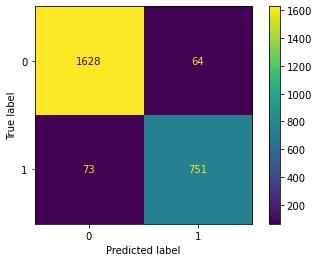

In [38]:
plot_confusion_matrix(best_clf, X_test, y_test)  
plt.show()  

In [39]:
class_dict

{'Female': 0, 'Male': 1}

## Saving the model

In [40]:
import pickle
import json

In [41]:
pickle_out = open("best_model.pickle","wb")
pickle.dump(best_clf, pickle_out)
pickle_out.close()

In [42]:
with open("class_dictionary.json", "w") as f:
    f.write(json.dumps(class_dict))